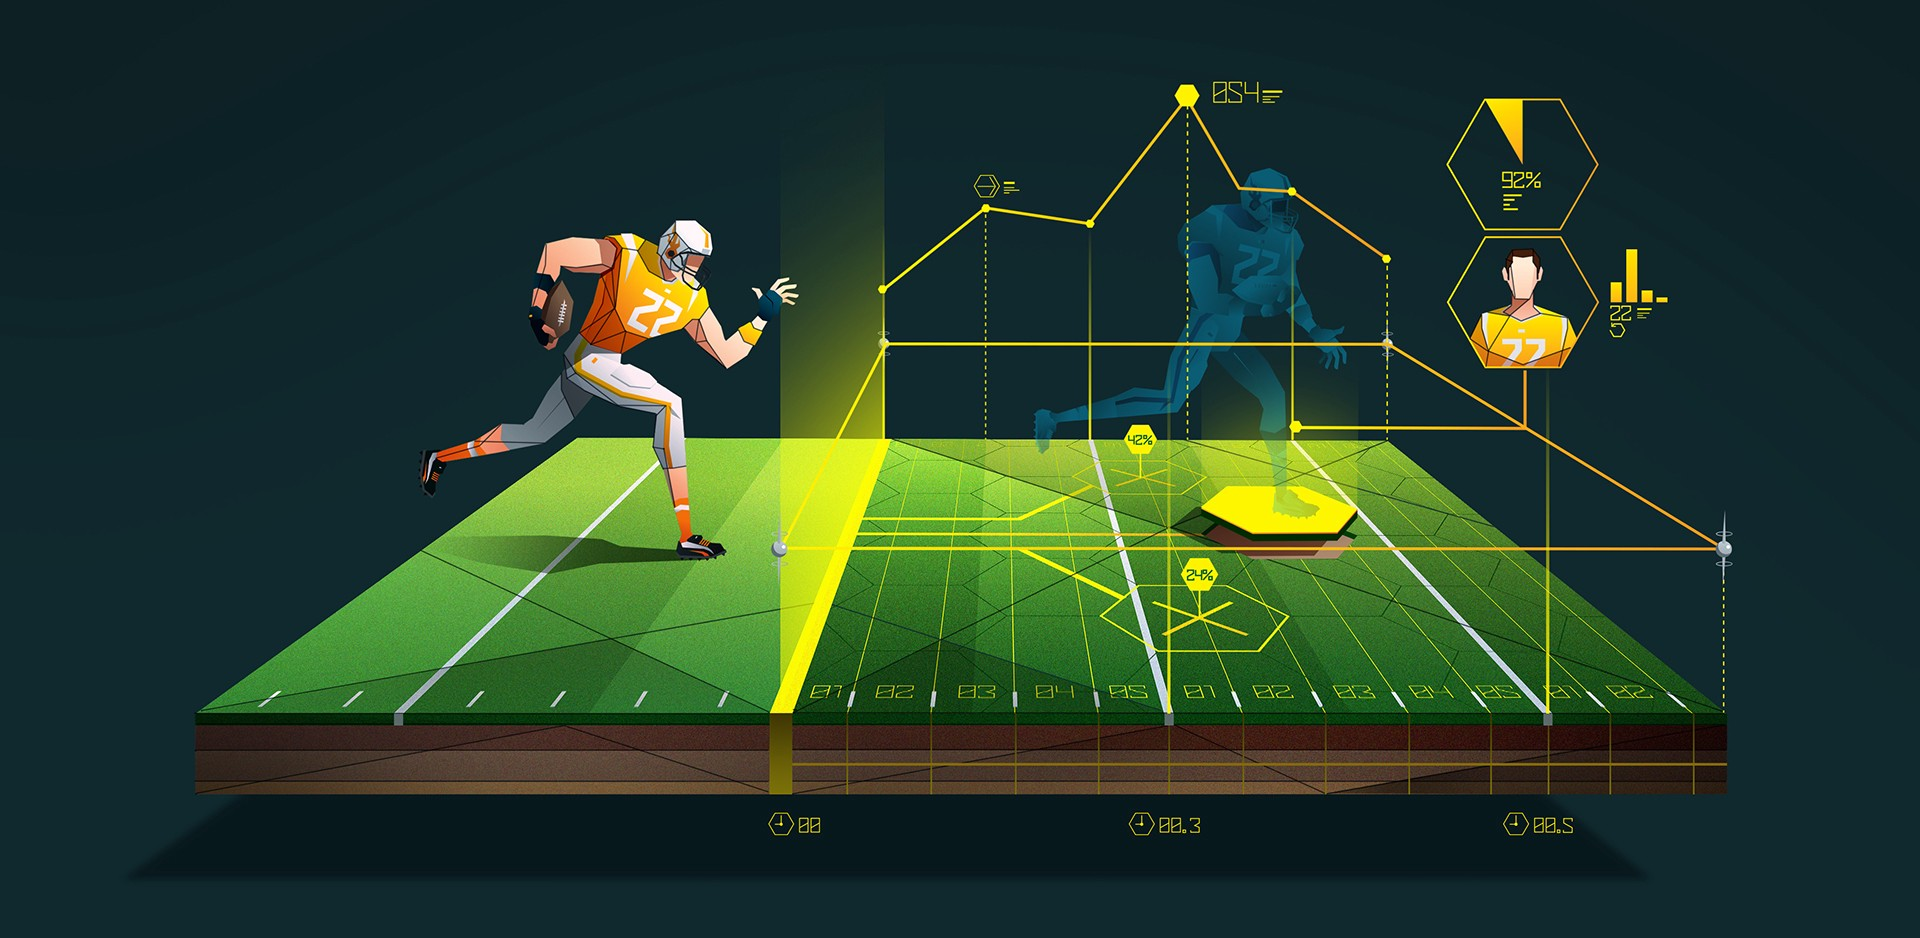

<h1>S05 T01: Assign sampling methods</h1>

<h2>Level 1</h2>

<h3>Exercici 1</h3>
Select a sports-themed dataset and performs data sampling by generating a simple random sample and a systematic sample.


In [112]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import random

**The dataset used in this notebook can be found in Kaggle. Use the below link to access it**


<a href="https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016?select=NFL+Play+by+Play+2009-2018+%28v5%29.csv">Detailed NFL Play-by-Play Data 2009-2018 </a>

<h4>The Data Set Glossary</h4>

**play_id** - Numeric play id that when used with game_id and drive provides
the unique identifier for a single play. <br>
**game_id** - Ten digit identifier for NFL game. <br>
**home_team** - String abbreviation for the home team. <br>
**away_team** - String abbreviation for the away team. <br>
**posteam** - String abbreviation for the team with possession. <br>
**posteam_type** - String indicating whether the posteam team is home or away. <br>
**defteam** - String abbreviation for the team on defense. <br>
**side_of_field** - String abbreviation for which team's side of the field
the team with possession is currently on. <br>
**yardline_100** - Numeric distance in the number of yards from the opponent's
endzone for the posteam. <br>
**game_date** - Date of the game. <br>
**quarter_seconds_remaining** - Numeric seconds remaining in the quarter. <br>
**half_seconds_remaining** - Numeric seconds remaining in the half. <br>
**game_seconds_remaining** - Numeric seconds remaining in the game. <br>
**game_half** - String indicating which half the play is in, either Half1, 
Half2, or Overtime. <br>
**quarter_end** - Binary indicator for whether or not the row of the data
is marking the end of a quarter. <br>
**drive** - Numeric drive number in the game. <br>
**sp** - Binary indicator for whether or not a score occurred on the play. <br>
**qtr** - Quarter of the game (5 is overtime). <br>
**down** - The down for the given play. <br>
**goal_to_go** - Binary indicator for whether or not the posteam is in a 
goal down situation. <br>
**time** - Time at start of play provided in string format as minutes:seconds 
remaining in the quarter. <br>
**yrdln** - String indicating the current field position for a given play. <br>
**ydstogo** - Numeric yards in distance from either the first down marker or
the endzone in goal down situations. <br>
**ydsnet** - Numeric value for total yards gained on the given drive. <br>
**desc** - Detailed string description for the given play. <br>
**play_type** - String indicating the type of play: pass (includes sacks), 
run (includes scrambles), punt, field_goal, kickoff, extra_point, 
qb_kneel, qb_spike, no_play (timeouts and penalties), and missing for rows
indicating end of play. <br>
**yards_gained** - Numeric yards gained (or lost) for the given play. <br>
**shotgun** - Binary indicator for whether or not the play was in shotgun
formation. <br>
**no_huddle** - Binary indicator for whether or not the play was in no_huddle formation. <br>
**qb_dropback** - Binary indicator for whether or not the QB dropped back on
the play (pass attempt, sack, or scrambled). <br>
**qb_kneel** - Binary indicator for whether or not the QB took a knee. <br>
**qb_spike** - Binary indicator for whether or not the QB spiked the ball. <br>
**qb_scramble** - Binary indicator for whether or not the QB scrambled. <br>
**pass_length** - String indicator for pass length: short or deep. <br>
**pass_location** - String indicator for pass location: left, middle, or right. <br>
**air_yards** - Numeric value for distance in yards perpendicular to the line
of scrimmage at where the targeted receiver either caught or didn't catch the ball. <br>
**yards_after_catch** - Numeric value for distance in yards perpendicular to
the yard line where the receiver made the reception to where the play ended. <br>
**run_location** - String indicator for location of run: left, middle, or right. <br>
**run_gap** - String indicator for line gap of run: end, guard, or tackle. <br>
**field_goal_result** - String indicator for result of field goal attempt:
made, missed, or blocked. <br>
**kick_distance** - Numeric distance in yards for kickoffs, field goals, 
and punts. <br>
**extra_point_result** - String indicator for the result of the extra point
attempt: good, failed, blocked, safety (touchback in defensive endzone is 1
point apparently), or aborted. <br>
**two_point_conv_result** - String indicator for result of two point conversion
attempt: success, failure, safety (touchback in defensive endzone is 1 point 
apparently), or return. <br>
**home_timeouts_remaining** - Numeric timeouts remaining in the half
for the home team. <br>
**away_timeouts_remaining** - Numeric timeouts remaining in the half for
the away team. <br>
**timeout** - Binary indicator for whether or not a timeout was called. <br>
**timeout_team** - String abbreviation for which team called the timeout. <br>
**td_team** - String abbreviation for which team scored the touchdown. <br>
**posteam_timeouts_remaining** - Number of timeouts remaining for the 
possession team. <br>
**defteam_timeouts_remaining** - Number of timeouts remaining for the 
team on defense. <br>
**total_home_score** - Score for the home team at the start of the play. <br>
**total_away_score** - Score for the away team at the start of the play. <br>
**posteam_score** - Score the posteam at the start of the play. <br>
**defteam_score** - Score the defteam at the start of the play. <br>
**score_differential** - Score differential between the posteam and defteam
at the start of the play. <br>
**posteam_score_post** - Score for the posteam at the end of the play. <br>
**defteam_score_post** - Score for the defteam at the end of the play. <br>
**score_differential_post** - Score differential between the posteam and 
defteam at the end of the play. <br>
**no_score_prob** - Predicted probability of no score occurring for the rest
of the half based on the expected points model. <br>
**opp_fg_prob** - Predicted probability of the defteam scoring a FG next. <br>
**opp_safety_prob** - Predicted probability of the defteam scoring a safety
next. <br>
**opp_td_prob** - Predicted probability of the defteam scoring a TD next. <br>
**fg_prob** - Predicted probability of the posteam scoring a FG next. <br>
**safety_prob** - Predicted probability of the posteam scoring a safety next. <br>
**td_prob** - Predicted probability of the posteam scoring a TD next. <br>
**extra_point_prob** - Predicted probability of the posteam scoring an extra point. <br>
**two_point_conversion_prob** - Predicted probability of the posteam scoring
the two point conversion. <br>
**ep** - Using the scoring event probabilities, the estimated expected points
with respect to the possession team for the given play. <br>
**epa** - Expected points added (EPA) by the posteam for the given play. <br>
**total_home_epa** - Cumulative total EPA for the home team in the game so far. <br>
**total_away_epa** - Cumulative total EPA for the away team in the game so far. <br>
**total_home_rush_epa** - Cumulative total rushing EPA for the home team in
the game so far. <br>
**total_away_rush_epa** - Cumulative total rushing EPA for the away team in
the game so far. <br>
**total_home_pass_epa** - Cumulative total passing EPA for the home team in
the game so far. <br>
**total_away_pass_epa** - Cumulative total passing EPA for the away team in
the game so far. <br>
**air_epa** - EPA from the air yards alone.  For completions this represents
the actual value provided through the air. For incompletions this represents
the hypothetical value that could've been added through the air if the pass
was completed.
**yac_epa** - EPA from the yards after catch alone. For completions this
represents the actual value provided after the catch. or incompletions this
represents the difference between the hypothetical air_epa and the play's raw
observed EPA (how much the incomplete pass cost the posteam). <br>
**comp_air_epa** - EPA from the air yards alone only for completions. <br>
**comp_yac_epa** - EPA from the yards after catch alone only for completions. <br>
**total_home_comp_air_epa** - Cumulative total completions air EPA for the home team in
the game so far. <br>
**total_away_comp_air_epa** - Cumulative total completions air EPA for the away team in
the game so far. <br>
**total_home_comp_yac_epa** - Cumulative total completions yac EPA for the home team in
the game so far. <br>
**total_away_comp_yac_epa** - Cumulative total completions yac EPA for the away team in
the game so far. <br>
**total_home_raw_air_epa** - Cumulative total raw air EPA for the home team in
the game so far. <br>
**total_away_raw_air_epa** - Cumulative total raw air EPA for the away team in
the game so far. <br>
**total_home_raw_yac_epa** - Cumulative total raw yac EPA for the home team in
the game so far. <br>
**total_away_raw_yac_epa** - Cumulative total raw yac EPA for the away team in
the game so far. <br>
**wp** - Estimated win probabiity for the posteam given the current situation
at the start of the given play. <br>
**def_wp** - Estimated win probability for the defteam. <br>
**home_wp** - Estimated win probability for the home team. <br>
**away_wp** - Estimated win probability for the away team. <br>
**wpa** - Win probability added (WPA) for the posteam. <br>
**home_wp_post** - Estimated win probability for the home team at the start of the play. <br>
**away_wp_post** - Estimated win probability for the away team at the start of the play. <br>
**total_home_rush_wpa** - Cumulative total rushing WPA for the home team in
the game so far. <br>
**total_away_rush_wpa** - Cumulative total rushing WPA for the away team in
the game so far. <br>
**total_home_pass_wpa** - Cumulative total passing WPA for the home team in
the game so far. <br>
**total_away_pass_wpa** - Cumulative total passing WPA for the away team in
the game so far. <br>
**air_wpa** - WPA through the air (same logic as air_epa). <br>
**yac_wpa** - WPA from yards after the catch (same logic as yac_epa). <br>
**comp_air_wpa** - The air_wpa for completions only. <br>
**comp_yac_wpa** - The yac_wpa for completions only. <br>
**total_home_comp_air_wpa** - Cumulative total completions air WPA for the home team in
the game so far. <br>
**total_away_comp_air_wpa** - Cumulative total completions air WPA for the away team in
the game so far. <br>
**total_home_comp_yac_wpa** - Cumulative total completions yac WPA for the home team in
the game so far. <br>
**total_away_comp_yac_wpa** - Cumulative total completions yac WPA for the away team in
the game so far. <br>
**total_home_raw_air_wpa** - Cumulative total raw air WPA for the home team in
the game so far. <br>
**total_away_raw_air_wpa** - Cumulative total raw air WPA for the away team in
the game so far. <br>
**total_home_raw_yac_wpa** - Cumulative total raw yac WPA for the home team in
the game so far. <br>
**total_away_raw_yac_wpa** - Cumulative total raw yac WPA for the away team in
the game so far. <br>
**punt_blocked** - Binary indicator for if the punt was blocked. <br>
**first_down_rush** - Binary indicator for if a running play converted the first down. <br>
**first_down_pass** - Binary indicator for if a passing play converted the first down. <br>
**first_down_penalty** - Binary indicator for if a penalty converted the first down. <br>
**third_down_converted** - Binary indicator for if the first down was converted on third down. <br>
**third_down_failed** - Binary indicator for if the posteam failed to convert first down on third down. <br>
**fourth_down_converted** - Binary indicator for if the first down was converted on fourth down. <br>
**fourth_down_failed** - Binary indicator for if the posteam failed to convert first down on fourth down. <br>
**incomplete_pass** - Binary indicator for if the pass was incomplete. <br>
**interception** - Binary indicator for if the pass was intercepted. <br>
**touchback** - Binary indicator for if a touchback occurred on the play. <br>
**punt_inside_twenty** - Binary indicator for if the punt ended inside the twenty yard line. <br>
**punt_in_endzone** - Binary indicator for if the punt was in the endzone. <br>
**punt_out_of_bounds** - Binary indicator for if the punt went out of bounds. <br>
**punt_downed** - Binary indicator for if the punt was downed. <br>
**punt_fair_catch** - Binary indicator for if the punt was caught with a fair catch. <br>
**kickoff_inside_twenty** - Binary indicator for if the kickoff ended inside the twenty yard line. <br>
**kickoff_in_endzone** - Binary indicator for if the kickoff was in the endzone. <br>
**kickoff_out_of_bounds** - Binary indicator for if the kickoff went out of bounds. <br>
**kickoff_downed** - Binary indicator for if the kickoff was downed. <br>
**kickoff_fair_catch** - Binary indicator for if the kickoff was caught with a fair catch. <br>
**fumble_forced** - Binary indicator for if the fumble was forced. <br>
**fumble_not_forced** - Binary indicator for if the fumble was not forced. <br>
**fumble_out_of_bounds** - Binary indicator for if the fumble went out of bounds. <br>
**solo_tackle** - Binary indicator if the play had a solo tackle (could be multiple
due to fumbles). <br>
**safety** - Binary indicator for whether or not a safety occurred. <br>
**penalty** - Binary indicator for whether or not a penalty occurred. <br>
**tackled_for_loss** - Binary indicator for whether or not a tackle for loss occurred. <br>
**fumble_lost** - Binary indicator for if the fumble was lost. <br>
**own_kickoff_recovery** - Binary indicator for if the kicking team recovered the
kickoff. <br>
**own_kickoff_recovery_td** - Binary indicator for if the kicking team recovered
the kickoff and scored a TD. <br>
**qb_hit** - Binary indicator if the QB was hit on the play. <br>
**rush_attempt** - Binary indicator for if the play was a run. <br>
**pass_attempt** - Binary indicator for if the play was a pass attempt (includes sacks). <br>
**sack** - Binary indicator for if the play ended in a sack. <br>
**touchdown** - Binary indicator for if the play resulted in a TD. <br>
**pass_touchdown** - Binary indicator for if the play resulted in a passing TD. <br>
**rush_touchdown** - Binary indicator for if the play resulted in a rushing TD. <br>
**return_touchdown** - Binary indicator for if the play resulted in a return TD. <br>
**extra_point_attempt** - Binary indicator for extra point attempt. <br>
**two_point_attempt** - Binary indicator for two point conversion attempt. <br>
**field_goal_attempt** - Binary indicator for field goal attempt. <br>
**kickoff_attempt** - Binary indicator for kickoff. <br>
**punt_attempt** - Binary indicator for punts. <br>
**fumble** - Binary indicator for if a fumble occurred. <br>
**complete_pass** - Binary indicator for if the pass was completed. <br>
**assist_tackle** - Binary indicator for if an assist tackle occurred. <br>
**lateral_reception** - Binary indicator for if a lateral occurred on the
reception. <br>
**lateral_rush** - Binary indicator for if a lateral occurred on a run. <br>
**lateral_return** - Binary indicator for if a lateral occurred on a return. <br>
**lateral_recovery** - Binary indicator for if a lateral occurred on a 
fumble recovery. <br>
**passer_player_id** - Unique identifier for the player that attempted the pass. <br>
**passer_player_name** - String name for the player that attempted the pass. <br>
**receiver_player_id** - Unique identifier for the receiver that was targeted on the pass. <br>
**receiver_player_name** - String name for the targeted receiver. <br>
**rusher_player_id** - Unique identifier for the player that attempted the run. <br>
**rusher_player_name** - String name for the player that attempted the run. <br>
**lateral_receiver_player_id** - Unique identifier for the player that received the lateral on a reception. <br>
**lateral_receiver_player_name** - String name for the player that received the lateral on a reception. <br>
**lateral_rusher_player_id** - Unique identifier for the player that received the lateral on a run. <br>
**lateral_rusher_player_name** - String name for the player that received the lateral on a run. <br>
**lateral_sack_player_id** - Unique identifier for the player that received the lateral on a sack. <br>
**lateral_sack_player_name** - String name for the player that received the lateral on a sack. <br>
**interception_player_id** - Unique identifier for the player that intercepted the pass. <br>
**interception_player_name** - String name for the player that intercepted the pass. <br>
**lateral_interception_player_id** - Unique indentifier for the player that received the lateral on an interception. <br>
**lateral_interception_player_name** - String name for the player that received the lateral on an interception. <br>
**punt_returner_player_id** - Unique identifier for the punt returner. <br>
**punt_returner_player_name** - String name for the punt returner. <br>
**lateral_punt_returner_player_id** - Unique identifier for the player that received the lateral on a punt return. <br>
**lateral_punt_returner_player_name** - String name for the player that received the lateral on a punt return. <br>
**kickoff_returner_player_name** - String name for the kickoff returner. <br>
**kickoff_returner_player_id** - Unique identifier for the kickoff returner. <br>
**lateral_kickoff_returner_player_id** - Unique identifier for the player that received the lateral on a kickoff return. <br>
**lateral_kickoff_returner_player_name** - String name for the player that received the lateral on a kickoff return. <br>
**punter_player_id** - Unique identifier for the punter. <br> 
**punter_player_name** - String name for the punter. <br>
**kicker_player_name** - String name for the kicker on FG or kickoff. <br>
**kicker_player_id** - Unique identifier for the kicker on FG or kickoff. <br>
**own_kickoff_recovery_player_id** - Unique identifier for the player that recovered their own kickoff. <br>
**own_kickoff_recovery_player_name** - String name for the player that recovered their own kickoff. <br>
**blocked_player_id** - Unique identifier for the player that blocked the punt or FG. <br>
**blocked_player_name** - String name for the player that blocked the punt or FG. <br>
**tackle_for_loss_1_player_id** - Unique identifier for one of the potential players with the tackle for loss. <br>
**tackle_for_loss_1_player_name** - String name for one of the potential players with the tackle for loss. <br>
**tackle_for_loss_2_player_id** - Unique identifier for one of the potential players with the tackle for loss. <br>
**tackle_for_loss_2_player_name** - String name for one of the potential players with the tackle for loss. <br>
**qb_hit_1_player_id** - Unique identifier for one of the potential players that hit the QB. <br>
**qb_hit_1_player_name** - String name for one of the potential players that hit the QB. <br>
**qb_hit_2_player_id** - Unique identifier for one of the potential players that hit the QB. <br>
**qb_hit_2_player_name** - String name for one of the potential players that hit the QB. <br>
**forced_fumble_player_1_team** - Team of one of the players with a forced fumble. <br>
**forced_fumble_player_1_player_id** - Unique identifier of one of the players with a forced fumble. <br>
**forced_fumble_player_1_player_name** - String name of one of the players with a forced fumble. <br>
**forced_fumble_player_2_team** - Team of one of the players with a forced fumble. <br>
**forced_fumble_player_2_player_id** - Unique identifier of one of the players with a forced fumble. <br>
**forced_fumble_player_2_player_name** - String name of one of the players with a forced fumble. <br>
**solo_tackle_1_team** - Team of one of the players with a solo tackle. <br>
**solo_tackle_2_team** - Team of one of the players with a solo tackle. <br>
**solo_tackle_1_player_id** - Unique identifier of one of the players with a solo tackle. <br>
**solo_tackle_2_player_id** - Unique identifier of one of the players with a solo tackle. <br>
**solo_tackle_1_player_name** - String name of one of the players with a solo tackle. <br>
**solo_tackle_2_player_name** - String name of one of the players with a solo tackle. <br>
**assist_tackle_1_player_id** - Unique identifier of one of the players with a tackle assist. <br>
**assist_tackle_1_player_name** - String name of one of the players with a tackle assist. <br>
**assist_tackle_1_team** - Team of one of the players with a tackle assist. <br>
**assist_tackle_2_player_id** - Unique identifier of one of the players with a tackle assist. <br>
**assist_tackle_2_player_name** - String name of one of the players with a tackle assist. <br>
**assist_tackle_2_team** - Team of one of the players with a tackle assist. <br>
**assist_tackle_3_player_id** - Unique identifier of one of the players with a tackle assist. <br>
**assist_tackle_3_player_name** - String name of one of the players with a tackle assist. <br>
**assist_tackle_3_team** - Team of one of the players with a tackle assist. <br>
**assist_tackle_4_player_id** - Unique identifier of one of the players with a tackle assist. <br>
**assist_tackle_4_player_name** - String name of one of the players with a tackle assist. <br>
**assist_tackle_4_team** - Team of one of the players with a tackle assist. <br>
**pass_defense_1_player_id** - Unique identifier of one of the players with a pass defense. <br>
**pass_defense_1_player_name** - String name of one of the players with a pass defense. <br>
**pass_defense_2_player_id** - Unique identifier of one of the players with a pass defense. <br>
**pass_defense_2_player_name** - String name of one of the players with a pass defense. <br>
**fumbled_1_team** - Team of one of the players with a fumble. <br>
**fumbled_1_player_id** - Unique identifier of one of the players with a fumble. <br>
**fumbled_1_player_name** - String name of one of the players with a fumble. <br>
**fumbled_2_player_id** - Unique identifier of one of the players with a fumble. <br>
**fumbled_2_player_name** - String name of one of the players with a fumble. <br>
**fumbled_2_team** - Team of one of the players with a fumble. <br>
**fumble_recovery_1_team** - Team of one of the players with a fumble recovery. <br>
**fumble_recovery_1_yards** - Yards gained by one of the players with a fumble recovery. <br>
**fumble_recovery_1_player_id** - Unique identifier of one of the players with a fumble recovery. <br>
**fumble_recovery_1_player_name** - String name of one of the players with a fumble recovery. <br>
**fumble_recovery_2_team** - Team of one of the players with a fumble recovery. <br>
**fumble_recovery_2_yards** - Yards gained by one of the players with a fumble recovery. <br>
**fumble_recovery_2_player_id** - Unique identifier of one of the players with a fumble recovery. <br>
**fumble_recovery_2_player_name** - String name of one of the players with a fumble recovery. <br>
**return_team** - String abbreviation of the return team. <br>
**return_yards** - Yards gained by the return team. <br>
**penalty_team** - String abbreviation of the team with the penalty. <br>
**penalty_player_id** - Unique identifier for the player with the penalty. <br>
**penalty_player_name** - String name for the player with the penalty. <br>
**penalty_yards** - Yards gained (or lost) by the posteam from the penalty. <br>
**replay_or_challenge** - Binary indicator for whether or not a replay or
challenge. <br>
**replay_or_challenge_result** - String indicating the result of the 
replay or challenge. <br>
**penalty_type** - String indicating the penalty type. <br>
**defensive_two_point_attempt** - Binary indicator whether or not the defense
was able to have an attempt on a two point conversion, this results following
a turnover. <br>
**defensive_two_point_conv** - Binary indicator whether or not the defense
successfully scored on the two point conversion. <br>
**defensive_extra_point_attempt** - Binary indicator whether or not the 
defense was able to have an attempt on an extra point attempt, this results
following a blocked attempt that the defense recovers the ball. <br>
**defensive_extra_point_conv** - Binary indicator whether or not the
defense successfully scored on an extra point attempt. <br> 

In [171]:
df = pd.read_csv("/Volumes/GoogleDrive/Mi unidad/Barcelona Activa/Itinerario Data Science/S05/NFL_Play_by_Play_2009-2018.csv",low_memory=False)
df_copy = df.copy()

<h4>DEA</h4>

In [172]:
df_copy.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [173]:
#The dataset is big, 449741 rows and 255 columns
df_copy.shape

(449371, 255)

In [174]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449371 entries, 0 to 449370
Columns: 255 entries, play_id to defensive_extra_point_conv
dtypes: float64(135), int64(18), object(102)
memory usage: 874.2+ MB


In [175]:
df_copy.dtypes

play_id                            int64
game_id                            int64
home_team                         object
away_team                         object
posteam                           object
                                  ...   
penalty_type                      object
defensive_two_point_attempt      float64
defensive_two_point_conv         float64
defensive_extra_point_attempt    float64
defensive_extra_point_conv       float64
Length: 255, dtype: object

In [176]:
df_copy.describe(include=[np.number]).round(3)

,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,assist_tackle_4_team,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,449371.000,4.493710e+05,436301.000,449230.000,449206.000,449208.000,449371.000,449371.000,449371.000,449371.000,...,0.0,6026.000,47.000,449350.000,32618.000,449371.000,436497.000,436497.000,436497.0,436497.0
mean,2140.690,2.013620e+09,49.801,413.969,810.776,1700.697,0.017,12.275,0.072,2.578,...,NaN,2.303,4.809,1.043,8.488,0.002,0.000,0.000,0.0,0.0
std,1240.304,2.842246e+06,25.062,279.137,554.712,1053.533,0.130,7.125,0.259,1.130,...,NaN,9.066,14.962,5.462,5.324,0.043,0.008,0.004,0.0,0.0
min,35.000,2.009091e+09,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,...,NaN,-34.000,-16.000,-18.000,0.000,0.000,0.000,0.000,0.0,0.0
25%,1074.000,2.011111e+09,31.000,152.000,286.000,784.000,0.000,6.000,0.000,2.000,...,NaN,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.0,0.0
50%,2125.000,2.013123e+09,52.000,396.000,797.000,1800.000,0.000,12.000,0.000,3.000,...,NaN,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.0,0.0
75%,3180.000,2.016103e+09,71.000,656.000,1288.000,2583.000,0.000,18.000,0.000,4.000,...,NaN,0.000,4.000,0.000,10.000,0.000,0.000,0.000,0.0,0.0
max,5706.000,2.018122e+09,99.000,900.000,1800.000,3600.000,1.000,38.000,1.000,5.000,...,NaN,93.000,77.000,109.000,66.000,1.000,1.000,1.000,0.0,0.0


In [177]:
df_copy.describe(include=[object])

,home_team,away_team,posteam,posteam_type,defteam,side_of_field,game_date,game_half,time,yrdln,...,fumble_recovery_1_player_name,fumble_recovery_2_team,fumble_recovery_2_player_id,fumble_recovery_2_player_name,return_team,penalty_team,penalty_player_id,penalty_player_name,replay_or_challenge_result,penalty_type
count,449371,449371,436129,436492,436492,448771,449371,449371,449230,448771,...,6027,47,47,46,30605,32636,32636,31207,812,31139
unique,35,35,35,2,35,36,472,3,1802,1769,...,2156,26,47,46,35,35,4066,3572,2,64
top,PHI,NE,NE,home,PHI,OAK,2018-11-11,Half2,15:00,MID 50,...,R.Wilson,PHI,0,J.Jackson,KC,OAK,0,A.Smith,upheld,Offensive Holding
freq,14510,14547,14269,219059,14038,14633,4100,223962,11782,5175,...,34,5,1,1,1092,1271,1429,157,452,6250


In [178]:
df_copy.columns

Index(['play_id', 'game_id', 'home_team', 'away_team', 'posteam',
       'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date',
       ...
       'penalty_player_id', 'penalty_player_name', 'penalty_yards',
       'replay_or_challenge', 'replay_or_challenge_result', 'penalty_type',
       'defensive_two_point_attempt', 'defensive_two_point_conv',
       'defensive_extra_point_attempt', 'defensive_extra_point_conv'],
      dtype='object', length=255)

In [179]:
df_copy.isnull().sum()

play_id                               0
game_id                               0
home_team                             0
away_team                             0
posteam                           13242
                                  ...  
penalty_type                     418232
defensive_two_point_attempt       12874
defensive_two_point_conv          12874
defensive_extra_point_attempt     12874
defensive_extra_point_conv        12874
Length: 255, dtype: int64

In [180]:
#Just for looking what is inside od the dataset 
for c in df_copy.columns:
    print(c, " :")
    print(df_copy[c].unique())

play_id  :
[  46   68   92 ... 5066 5206 5253]
game_id  :
[2009091000 2009091304 2009091307 ... 2018121610 2018121611 2018121700]
home_team  :
['PIT' 'CLE' 'NO' 'TB' 'HOU' 'IND' 'CIN' 'CAR' 'BAL' 'ATL' 'ARI' 'SEA'
 'NYG' 'GB' 'NE' 'OAK' 'DET' 'WAS' 'TEN' 'PHI' 'NYJ' 'KC' 'JAC' 'SF' 'BUF'
 'SD' 'DEN' 'CHI' 'DAL' 'MIA' 'MIN' 'STL' 'LA' 'JAX' 'LAC']
away_team  :
['TEN' 'MIN' 'DET' 'DAL' 'NYJ' 'JAC' 'DEN' 'PHI' 'KC' 'MIA' 'SF' 'STL'
 'WAS' 'CHI' 'BUF' 'SD' 'CAR' 'HOU' 'NO' 'NE' 'OAK' 'ARI' 'CIN' 'SEA' 'TB'
 'BAL' 'CLE' 'PIT' 'NYG' 'IND' 'ATL' 'GB' 'LA' 'JAX' 'LAC']
posteam  :
['PIT' 'TEN' nan 'CLE' 'MIN' 'NO' 'DET' 'DAL' 'TB' 'HOU' 'NYJ' 'IND' 'JAC'
 'DEN' 'CIN' 'CAR' 'PHI' 'KC' 'BAL' 'ATL' 'MIA' 'ARI' 'SF' 'STL' 'SEA'
 'NYG' 'WAS' 'GB' 'CHI' 'NE' 'BUF' 'OAK' 'SD' 'LA' 'JAX' 'LAC']
posteam_type  :
['home' 'away' nan]
defteam  :
['TEN' 'PIT' nan 'MIN' 'CLE' 'DET' 'NO' 'TB' 'DAL' 'NYJ' 'HOU' 'JAC' 'IND'
 'CIN' 'DEN' 'PHI' 'CAR' 'BAL' 'KC' 'MIA' 'ATL' 'SF' 'ARI' 'SEA' 'STL'
 'WAS' 'NYG' 'CHI'

['R.Bironas kicks 67 yards from TEN 30 to PIT 3. S.Logan to PIT 42 for 39 yards (M.Griffin).'
 '(14:53) B.Roethlisberger pass short left to H.Ward to PIT 47 for 5 yards (C.Hope).'
 '(14:16) W.Parker right end to PIT 44 for -3 yards (S.Tulloch).' ...
 '(:58) (Shotgun) C.Newton pass short middle to J.Wright to CAR 39 for 5 yards (E.Apple).'
 '(:38) (No Huddle, Shotgun) C.Newton pass incomplete short right to I.Thomas [D.Davis].'
 '(:35) D.Brees kneels to CAR 40 for -1 yards.']
play_type  :
['kickoff' 'pass' 'run' 'punt' 'field_goal' 'no_play' nan 'extra_point'
 'qb_kneel' 'qb_spike']
yards_gained  :
[  0.   5.  -3.   4.  -2.   3.  10.  -1.   9. -19.  32.  20.   1.   2.
  -9.   8.  11. -10.  18.  15.  12.  29.  34.  57.  14.  -8.   7.  17.
   6.  16.  -6.  30.  22.  -4.  13.  21.  19.  -7.  64.  26.  39.  58.
  35.  23.  42.  47.  66.  80.  44.  25.  27. -13.  40.  38.  -5.  87.
 -23. -11.  50.  24.  31. -14. -18.  33.  62.  45.  68.  36. -12.  28.
  69.  72.  91.  71. -17.  79.  43.  81.

[ 0.         -0.93873536 -0.41709389 ...  5.67510151  6.19964019
  5.76046327]
total_away_comp_air_epa  :
[ 0.          0.93873536  0.41709389 ... -5.67510151 -6.19964019
 -5.76046327]
total_home_comp_yac_epa  :
[ 0.          1.01664251  0.67415043 ... -0.40696849 -0.67813873
 -0.55976109]
total_away_comp_yac_epa  :
[ 0.         -1.01664251 -0.67415043 ...  0.40696849  0.67813873
  0.55976109]
total_home_raw_air_epa  :
[ 0.         -0.93873536  2.47383697 ...  5.5893472   5.15017029
  2.68795724]
total_away_raw_air_epa  :
[ 0.          0.93873536 -2.47383697 ... -5.5893472  -5.15017029
 -2.68795724]
total_home_raw_yac_epa  :
[ 0.          1.01664251 -4.10851331 ...  1.83607362  1.95445126
  4.12999244]
total_away_raw_yac_epa  :
[ 0.         -1.01664251  4.10851331 ... -1.83607362 -1.95445126
 -4.12999244]
wp  :
[       nan 0.54643284 0.55108782 ... 0.0966922  0.07449785 0.03221711]
def_wp  :
[       nan 0.45356716 0.44891218 ... 0.9033078  0.92550215 0.96778289]
home_wp  :
[       nan 

[nan '00-0023471' '00-0021377' '00-0009889' '00-0025393' '00-0019613'
 '00-0022844' '00-0024360' '00-0023497' '00-0027060' '00-0022923'
 '00-0028420' '00-0027943' '00-0028059' '00-0023405' '00-0023013'
 '00-0027705' '00-0029696' '00-0030459' '00-0033568']
lateral_interception_player_name  :
[nan 'B.Ruud' 'E.Reed' 'R.Lewis' 'L.Landry' 'R.Brown' 'S.Jones' 'D.Landry'
 'B.McFadden' 'L.Webb' 'D.Hall' 'K.Rutland' 'P.Peterson' 'C.Prosinski'
 'A.Elam' 'B.Browner' 'A.Verner' 'C.Lewis-Harris' 'T.Mathieu' 'N.Hairston']
punt_returner_player_id  :
[nan '00-0026491' '00-0024429' '00-0023176' '00-0025951' '00-0019650'
 '00-0024217' '00-0022766' '00-0026113' '00-0022045' '00-0024332'
 '00-0025460' '00-0023287' '00-0024452' '00-0026444' '00-0026716'
 '00-0026182' '00-0026944' '00-0026189' '00-0023008' '00-0021377'
 '00-0026089' '00-0004915' '00-0026000' '00-0024535' '00-0014071'
 '00-0023443' '00-0021999' '00-0025636' '00-0026373' '00-0024345'
 '00-0020494' '00-0026176' '00-0024272' '00-0022427' '00-00

['R.Bironas' nan 'J.Reed' 'R.Longwell' 'P.Dawson' 'J.Hanson' 'J.Carney'
 'T.Morstead' 'M.Nugent' 'N.Folk' 'D.Buehler' 'J.Feely' 'K.Brown'
 'J.Scobee' 'A.Vinatieri' 'S.Andrus' 'S.Graham' 'M.Prater' 'D.Akers'
 'J.Kasay' 'R.Lloyd' 'S.Hauschka' 'R.Succop' 'D.Carpenter' 'J.Elam'
 'M.Koenen' 'B.Fields' 'J.Nedney' 'N.Rackers' 'O.Mare' 'Josh.Brown'
 'S.Suisham' 'L.Tynes' 'R.Gould' 'M.Crosby' 'J.Kapinos' 'R.Lindell'
 'S.Gostkowski' 'N.Kaeding' 'S.Janikowski' 'P.McAfee' 'B.Cundiff'
 'S.Lechler' 'D.Johnson' 'K.Moore' 'M.Stover' 'B.Moorman' 'D.Jones'
 'C.Barth' 'N.Harris' 'D.Colquitt' 'M.Bryant' 'G.Hartley' 'G.Gano'
 'K.Biermann' 'R.Schmitt' 'B.Graham' 'T.Carter' 'M.Dodge' 'A.Lee' 'J.Ryan'
 'M.Scifres' 'B.Maynard' 'N.Suh' 'W.Welker' 'D.Rayner' 'M.McBriar'
 'A.Pettrey' 'C.Stitser' 'H.Smith' 'A.Henery' 'M.Bosher' 'B.Hartmann'
 'D.Bailey' 'M.Turk' 'N.Novak' 'S.Weatherford' 'R.Donahue' 'C.Kluwe'
 'A.Podlesh' 'D.Zastudil' 'Z.Mesko' 'B.Colquitt' 'R.Allen' 'S.Koch'
 'T.Masthay' 'B.Coutu' 'G.Zuerlein' 'B.

[nan '00-0025591' '00-0024382' '00-0023509' '00-0026190' '00-0022161'
 '00-0019545' '00-0021577' '00-0022344' '00-0022867' '00-0021228'
 '00-0024237' '00-0026232' '00-0025557' '00-0026989' '00-0026991'
 '00-0019695' '00-0021990' '00-0003874' '00-0025434' '00-0019546'
 '00-0021332' '00-0025523' '00-0022805' '00-0026172' '00-0021995'
 '00-0021081' '00-0021099' '00-0023494' '00-0024356' '00-0027044'
 '00-0022059' '00-0027046' '00-0019696' '00-0023622' '00-0023199'
 '00-0021257' '00-0026105' '00-0022927' '00-0019538' '00-0025444'
 '00-0024258' '00-0026343' '00-0019387' '00-0024373' '00-0013126'
 '00-0026683' '00-0001563' '00-0020491' '00-0021140' '00-0025398'
 '00-0022888' '00-0026150' '00-0022793' '00-0023481' '00-0022409'
 '00-0026084' '00-0019986' '00-0025640' '00-0020426' '00-0023008'
 '00-0023566' '00-0024278' '00-0025413' '00-0024354' '00-0027074'
 '00-0025697' '00-0024222' '00-0026742' '00-0026912' '00-0022038'
 '00-0023750' '00-0026145' '00-0020382' '00-0021490' '00-0023368'
 '00-0

['M.Griffin' 'C.Hope' 'S.Tulloch' ... 'D.Schultz' 'De.Hall' 'J.Natson']
solo_tackle_2_player_name  :
[nan 'M.Roos' 'H.Miller' ... 'B.Jarwin' 'B.Winters' 'R.Woods']
assist_tackle_1_player_id  :
[nan '00-0021344' '00-0026194' ... '00-0033913' '00-0034662' '00-0034396']
assist_tackle_1_player_name  :
[nan 'B.Keisel' 'J.Jones' ... 'C.Wormley' 'J.Kalu' 'Te.Edmunds']
assist_tackle_1_team  :
[nan 'PIT' 'TEN' 'MIN' 'CLE' 'DET' 'NO' 'DAL' 'TB' 'NYJ' 'HOU' 'JAC' 'IND'
 'CIN' 'DEN' 'PHI' 'CAR' 'BAL' 'KC' 'MIA' 'ATL' 'SF' 'ARI' 'STL' 'SEA'
 'WAS' 'NYG' 'CHI' 'GB' 'BUF' 'NE' 'SD' 'OAK' 'LA' 'JAX' 'LAC']
assist_tackle_2_player_id  :
[nan '00-0005082' '00-0024331' ... '00-0031156' '00-0027656' '00-0034461']
assist_tackle_2_player_name  :
[nan 'J.Farrior' 'S.Tulloch' ... 'T.Ott' 'R.Gronkowski' 'B.Hector']
assist_tackle_2_team  :
[nan 'PIT' 'TEN' 'MIN' 'CLE' 'DET' 'NO' 'DAL' 'TB' 'NYJ' 'HOU' 'JAC' 'IND'
 'CIN' 'DEN' 'PHI' 'CAR' 'BAL' 'KC' 'MIA' 'ATL' 'SF' 'ARI' 'STL' 'SEA'
 'WAS' 'NYG' 'CHI' 'GB' 'BUF'

[nan 'K.Fox' 'C.Finnegan' ... 'J.Shaw' 'D.Dennard' 'D.Alexander']
fumble_recovery_2_team  :
[nan 'KC' 'PHI' 'MIA' 'OAK' 'NE' 'CHI' 'ARI' 'DET' 'DEN' 'JAC' 'SEA' 'HOU'
 'GB' 'NYG' 'TEN' 'STL' 'MIN' 'CIN' 'IND' 'SF' 'ATL' 'PIT' 'DAL' 'NYJ'
 'CLE' 'TB']
fumble_recovery_2_yards  :
[ nan   0.   2.   3.  10.  -8.   5.   6.  58.  16.  77.  -3.  -2.  27.
  13.   7. -16.]
fumble_recovery_2_player_id  :
[nan '0' '00-0021504' '00-0021214' '00-0004851' '00-0022427' '00-0022085'
 '00-0025682' '00-0025471' '00-0021654' '00-0027083' '00-0027429'
 '00-0027009' '00-0027105' '00-0025848' '00-0024281' '00-0027078'
 '00-0025560' '00-0029566' '00-0025761' '00-0027701' '00-0022045'
 '00-0026307' '00-0025534' '00-0027136' '00-0027150' '00-0030566'
 '00-0024272' '00-0028954' '00-0026280' '00-0029596' '00-0027730'
 '00-0025549' '00-0018227' '00-0028002' '00-0024334' '00-0028368'
 '00-0029410' '00-0028908' '00-0031556' '00-0028008' '00-0030546'
 '00-0031408' '00-0033880' '00-0031120' '00-0033555' '00-0030615'
 

In [181]:
#Create a subset of the dataset for the task

df_plays = df_copy[["game_id","home_team","away_team","defteam","posteam","total_home_score","total_away_score","play_type","yards_gained","sp","qtr","time"]]
df_plays

,game_id,home_team,away_team,defteam,posteam,total_home_score,total_away_score,play_type,yards_gained,sp,qtr,time
0,2009091000,PIT,TEN,TEN,PIT,0,0,kickoff,0.0,0,1,15:00
1,2009091000,PIT,TEN,TEN,PIT,0,0,pass,5.0,0,1,14:53
2,2009091000,PIT,TEN,TEN,PIT,0,0,run,-3.0,0,1,14:16
3,2009091000,PIT,TEN,TEN,PIT,0,0,pass,0.0,0,1,13:35
4,2009091000,PIT,TEN,TEN,PIT,0,0,punt,0.0,0,1,13:27
...,...,...,...,...,...,...,...,...,...,...,...,...
449366,2018121700,CAR,NO,NO,CAR,7,12,pass,0.0,0,4,01:03:00
449367,2018121700,CAR,NO,NO,CAR,7,12,pass,5.0,0,4,00:58:00
449368,2018121700,CAR,NO,NO,CAR,7,12,pass,0.0,0,4,00:38:00
449369,2018121700,CAR,NO,CAR,NO,7,12,qb_kneel,-1.0,0,4,00:35:00


In [182]:
df_plays.describe()

,game_id,total_home_score,total_away_score,yards_gained,sp,qtr
count,4.493710e+05,449371.000000,449371.000000,449158.000000,449371.000000,449371.000000
mean,2.013620e+09,12.032764,10.560561,3.903698,0.072090,2.577696
std,2.842246e+06,10.204185,9.540286,7.884118,0.258637,1.129958
min,2.009091e+09,0.000000,0.000000,-38.000000,0.000000,1.000000
25%,2.011111e+09,3.000000,3.000000,0.000000,0.000000,2.000000
50%,2.013123e+09,10.000000,9.000000,0.000000,0.000000,3.000000
75%,2.016103e+09,19.000000,17.000000,6.000000,0.000000,4.000000
max,2.018122e+09,61.000000,58.000000,99.000000,1.000000,5.000000


In [183]:
df_plays.isnull().sum()

game_id                 0
home_team               0
away_team               0
defteam             12879
posteam             13242
total_home_score        0
total_away_score        0
play_type           12874
yards_gained          213
sp                      0
qtr                     0
time                  141
dtype: int64

[(-20.0, 50.0)]

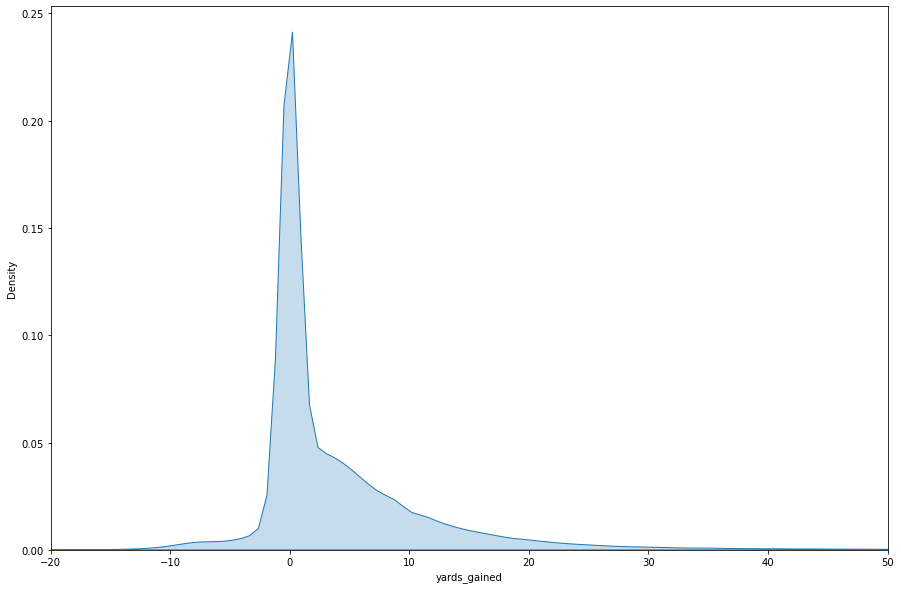

In [184]:
#In this exercise we will work with the yards gained
#The plot will show the density of the yards gained

plt.figure(figsize = (15,10))
fig = sns.kdeplot(df_plays['yards_gained'],bw_method=.10, shade=True)
fig.set(xlim=(-20, 50))

<h4>Simple Random Sample </h4>

The simple random sample a python method in pandas use a n-number of samples
for this method is importand to calculare the sample size 
at first I select a random number (500) and the result was not good in comparison with other sampling methods


We have a population of 449371 games, confidence interval = 5% ,conficence level = 95%,
Z = 1.96

In [185]:
sample_size = round(((1.96**2)*.5*.5)/(.05**2))
sample_size

384

The sample will be 384 games

In [186]:
simple_random_sample_set = df_plays.sample(n = 384)
simple_random_sample_set.head()

,game_id,home_team,away_team,defteam,posteam,total_home_score,total_away_score,play_type,yards_gained,sp,qtr,time
253493,2014111700,TEN,PIT,TEN,PIT,7,12,field_goal,0.0,1,1,01:08
437511,2018111808,LAC,DEN,DEN,LAC,19,7,pass,7.0,0,3,06:36:00
392536,2017112607,LA,NO,LA,NO,23,10,pass,0.0,0,4,12:43
106338,2011102306,CLE,SEA,SEA,CLE,3,0,pass,19.0,0,2,00:01
60030,2010101712,WAS,IND,WAS,IND,7,14,pass,4.0,0,2,03:41


In [187]:
simple_random_sample_set.describe()

,game_id,total_home_score,total_away_score,yards_gained,sp,qtr
count,3.840000e+02,384.000000,384.000000,384.000000,384.000000,384.000000
mean,2.013674e+09,12.299479,10.770833,3.710938,0.070312,2.611979
std,2.834097e+06,9.650628,9.679435,7.263219,0.256006,1.159798
min,2.009091e+09,0.000000,0.000000,-11.000000,0.000000,1.000000
25%,2.011111e+09,6.000000,0.000000,0.000000,0.000000,2.000000
50%,2.014092e+09,10.000000,10.000000,0.000000,0.000000,2.500000
75%,2.016102e+09,19.250000,17.000000,6.000000,0.000000,4.000000
max,2.018122e+09,44.000000,49.000000,68.000000,1.000000,5.000000


[(-20.0, 50.0)]

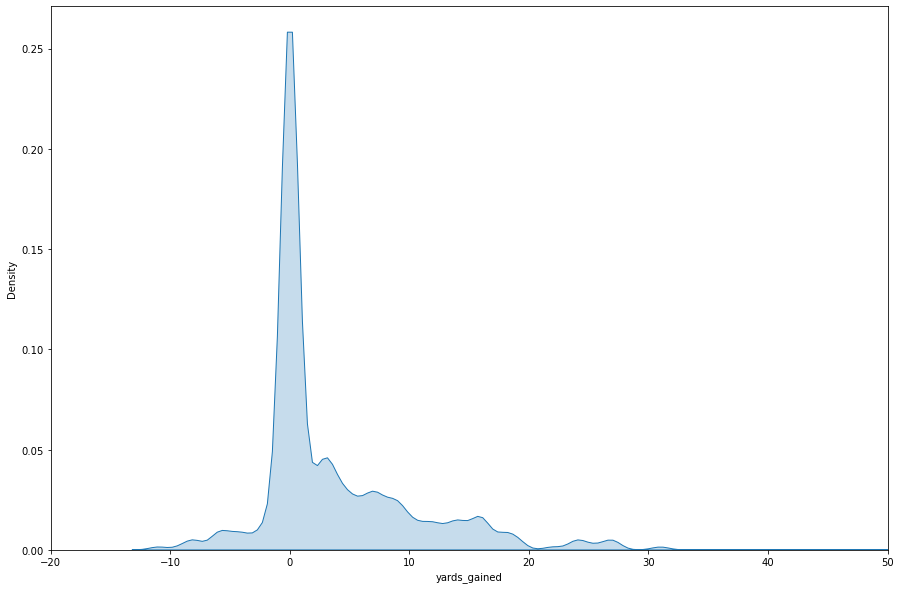

In [188]:
plt.figure(figsize = (15,10))
fig = sns.kdeplot(simple_random_sample_set['yards_gained'],bw_method=.10, shade=True)
fig.set(xlim=(-20, 50))

<h4>Systematic Sampling</h4>

In [189]:
#the method needs a sample step, it can be calculate as show below:

sample_steps = round(len(df_plays)/sample_size)
sample_steps

1170

In [190]:
#function to get the n-sample of the dataset 
def systematic_sampling(df, step):
    n_sample = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[n_sample]
    return systematic_sample

In [191]:
systematic_sample_set = systematic_sampling(df_plays, sample_steps)
systematic_sample_set

,game_id,home_team,away_team,defteam,posteam,total_home_score,total_away_score,play_type,yards_gained,sp,qtr,time
0,2009091000,PIT,TEN,TEN,PIT,0,0,kickoff,0.0,0,1,15:00
1170,2009091303,CIN,DEN,NaN,NaN,0,6,NaN,0.0,0,4,02:00
2340,2009091312,GB,CHI,CHI,GB,10,12,run,3.0,0,3,02:31
3510,2009092006,PHI,NO,NaN,NaN,10,10,NaN,0.0,0,2,01:59
4680,2009092009,BUF,TB,TB,BUF,28,14,pass,43.0,1,4,09:23
...,...,...,...,...,...,...,...,...,...,...,...,...
444600,2018120906,MIA,NE,MIA,NE,28,33,field_goal,0.0,1,4,00:21:00
445770,2018120911,ARI,DET,NaN,NaN,0,3,NaN,0.0,0,2,04:46:00
446940,2018121501,DEN,CLE,CLE,DEN,0,0,pass,-8.0,0,1,14:35:00
448110,2018121608,NYG,TEN,TEN,NYG,0,7,pass,-2.0,0,3,05:16:00


In [192]:
systematic_sample_set.describe()

,game_id,total_home_score,total_away_score,yards_gained,sp,qtr
count,3.850000e+02,385.000000,385.000000,385.000000,385.000000,385.000000
mean,2.013616e+09,11.353247,10.049351,3.935065,0.077922,2.540260
std,2.845818e+06,9.472267,9.008396,7.700341,0.268398,1.142943
min,2.009091e+09,0.000000,0.000000,-18.000000,0.000000,1.000000
25%,2.011111e+09,3.000000,3.000000,0.000000,0.000000,2.000000
50%,2.013123e+09,10.000000,7.000000,0.000000,0.000000,2.000000
75%,2.016103e+09,17.000000,16.000000,6.000000,0.000000,4.000000
max,2.018122e+09,48.000000,43.000000,43.000000,1.000000,5.000000


[(-30.0, 50.0)]

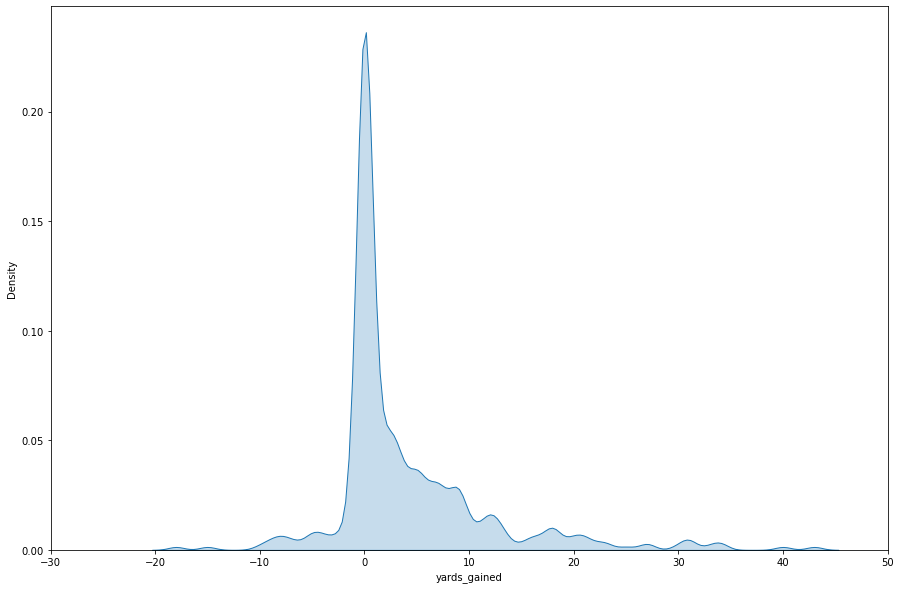

In [193]:
plt.figure(figsize = (15,10))
fig = sns.kdeplot(systematic_sample_set['yards_gained'],bw_method=.10, shade=True)
fig.set(xlim=(-30, 50))

<h2>Level 2</h2>

<h3>Exercise 2</h3>
Continue with the sports-themed dataset and generates a stratified sample and a sample using SMOTE (Synthetic Minority Oversampling Technique).  

<h4>Stratified Sample.</h4>

In [194]:
# I had problemns with the NaN's and I read that the Train Test Split don't have problems 
# with them and a solution was drop the nan in the DataFrame

df_plays.dropna(inplace=True)

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [195]:
# I had another problem with the number of samples, the fist time I choose to stratify,
# yards_gained but raides a "ValueError: The least populated class in y has only 1 member, 
# which is too few. The minimum number of groups for any class cannot be less than 2."
# The solution is to choose another column, play_type.

# A recommended ratio for test_size is .2

X_train, X_test = train_test_split(df_plays, test_size= 0.2, stratify=df_plays.play_type)
X_train.head()

,game_id,home_team,away_team,defteam,posteam,total_home_score,total_away_score,play_type,yards_gained,sp,qtr,time
416701,2018093004,IND,HOU,HOU,IND,0,0,run,0.0,0,1,15:00:00
160082,2012111200,PIT,KC,KC,PIT,0,10,kickoff,0.0,0,2,14:20
412352,2018091609,LA,ARI,ARI,LA,8,0,run,0.0,0,2,12:14:00
232645,2014092110,ARI,SF,ARI,SF,13,14,punt,0.0,0,3,07:39
413413,2018092300,ATL,NO,NO,ATL,14,13,no_play,0.0,0,2,00:53:00


In [196]:
X_train.shape

(348732, 12)

In [197]:
X_train.describe()

,game_id,total_home_score,total_away_score,yards_gained,sp,qtr
count,3.487320e+05,348732.000000,348732.000000,348732.000000,348732.000000,348732.000000
mean,2.013614e+09,11.928151,10.469650,4.027491,0.074051,2.570885
std,2.838754e+06,10.169592,9.499584,7.986525,0.261854,1.129731
min,2.009091e+09,0.000000,0.000000,-38.000000,0.000000,1.000000
25%,2.011111e+09,3.000000,3.000000,0.000000,0.000000,2.000000
50%,2.013123e+09,10.000000,9.000000,0.000000,0.000000,3.000000
75%,2.016103e+09,19.000000,17.000000,6.000000,0.000000,4.000000
max,2.018122e+09,61.000000,58.000000,99.000000,1.000000,5.000000


[(-30.0, 50.0)]

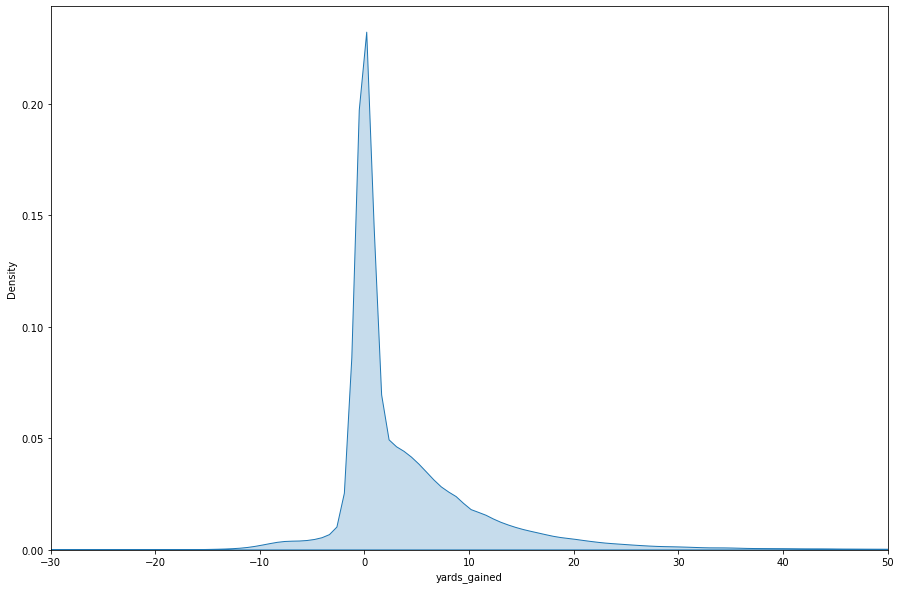

In [198]:
plt.figure(figsize = (15,10))
fig = sns.kdeplot(X_train['yards_gained'],bw_method=.10, shade=True)
fig.set(xlim=(-30, 50))

<h4>SMOTE (Synthetic Minority Oversampling Technique).</h4>

In [199]:
#is important to drop the object values

smote_class = df_plays.drop(columns=["home_team","away_team","defteam","posteam","play_type","time"])

smote = SMOTE(sampling_strategy='not majority', random_state=1, k_neighbors=3)
smote_X, smote_y = smote.fit_resample(smote_class,smote_class.game_id)

smote_X.head()

,game_id,total_home_score,total_away_score,yards_gained,sp,qtr
0,2009091000,0,0,0.0,0,1
1,2009091000,0,0,5.0,0,1
2,2009091000,0,0,-3.0,0,1
3,2009091000,0,0,0.0,0,1
4,2009091000,0,0,0.0,0,1


In [200]:
smote_X.describe()

,game_id,total_home_score,total_away_score,yards_gained,sp,qtr
count,8.992560e+05,899256.000000,899256.000000,899256.000000,899256.000000,899256.000000
mean,2.013579e+09,11.934541,10.434321,3.931621,0.038351,2.560513
std,2.837283e+06,10.162918,9.484125,7.614405,0.192041,1.126688
min,2.009091e+09,0.000000,0.000000,-38.000000,0.000000,1.000000
25%,2.011111e+09,3.000000,3.000000,0.000000,0.000000,2.000000
50%,2.013123e+09,10.000000,9.000000,0.000000,0.000000,3.000000
75%,2.016102e+09,19.000000,17.000000,6.000000,0.000000,4.000000
max,2.018122e+09,61.000000,58.000000,99.000000,1.000000,5.000000


[(-30.0, 50.0)]

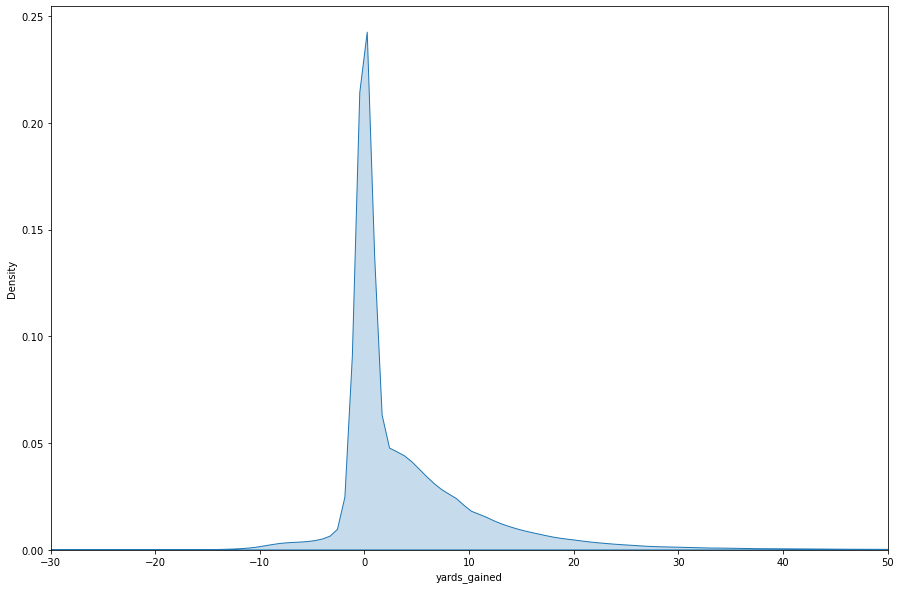

In [201]:
plt.figure(figsize = (15,10))
fig = sns.kdeplot(smote_X['yards_gained'],bw_method=.10, shade=True)
fig.set(xlim=(-30, 50))

<h2>Level 3</h2>

<h3>Exercise 3</h3>
Continue with the sports-themed dataset and generates a sample using the Reservoir sampling method.

In [202]:
#the reservoir sampling method select a random sample from a large dataset 

def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number

stream = generator(len(df_plays))
k=384
reservoir = []

for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
             reservoir[random.choice(range(0,k))] = element

In [203]:
reservoir_sample = df_plays.iloc[reservoir]
reservoir_sample.head()

,game_id,home_team,away_team,defteam,posteam,total_home_score,total_away_score,play_type,yards_gained,sp,qtr,time
103493,2011101603,WAS,PHI,PHI,WAS,0,20,pass,18.0,0,2,01:56
298904,2015112210,SEA,SF,SEA,SF,7,0,pass,2.0,0,1,09:21
13545,2009101802,JAC,STL,JAC,STL,0,6,pass,17.0,1,1,10:17
355620,2016121809,ATL,SF,ATL,SF,38,13,pass,8.0,0,3,01:31
297568,2015112208,BAL,STL,BAL,STL,3,7,run,16.0,0,3,06:55


[(-30.0, 50.0)]

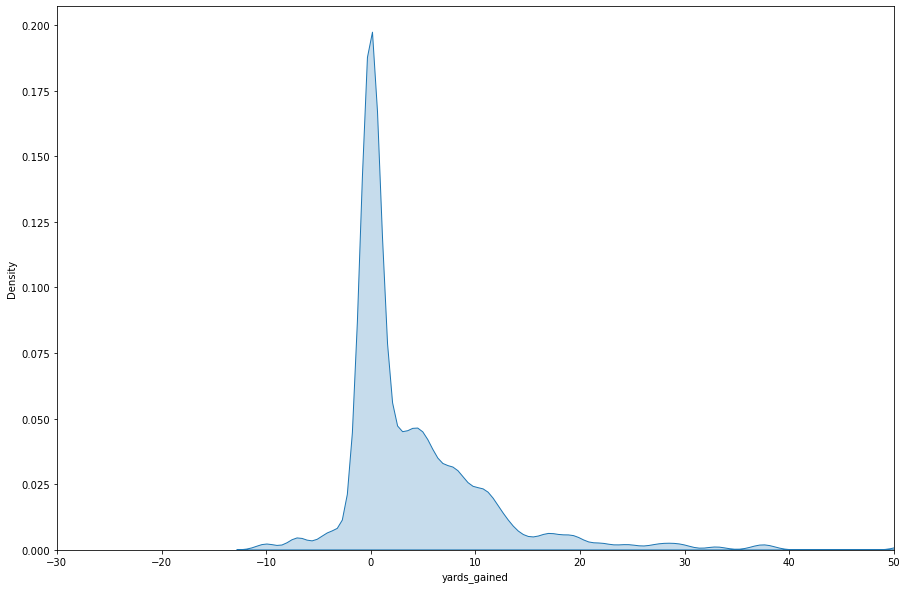

In [204]:
plt.figure(figsize = (15,10))
fig = sns.kdeplot(reservoir_sample['yards_gained'],bw_method=.10, shade=True)
fig.set(xlim=(-30, 50))

<h2>Comparative</h2>

In [205]:
def mean_sample(df):
    mean_sample = np.round(np.mean(df.yards_gained),2)
    return mean_sample

In [206]:
def abs_error(mean):
    abs_error = abs(mean_yards_gained_original-mean)
    return abs_error

In [207]:
mean_yards_gained_original = mean_sample(df_plays)
mean_yards_gained_simple_random_sample = mean_sample(simple_random_sample_set)
mean_yards_gained_systematic_sample = mean_sample(systematic_sample_set)
mean_yards_gained_stratified_sample = mean_sample(X_train)
mean_yards_gained_smote = mean_sample(smote_X)
mean_yards_gained_reservoir_sample = mean_sample(reservoir_sample)


In [208]:
simple_random_error = abs_error(mean_yards_gained_simple_random_sample)
systematic_error = abs_error(mean_yards_gained_systematic_sample)
stratified_error = abs_error(mean_yards_gained_stratified_sample)
smote_error = abs_error(mean_yards_gained_smote)
reservoir_error = abs_error(mean_yards_gained_reservoir_sample)

In [209]:
table = [["Sample Set","Mean Yards Gained","Original Mean","abs error"],
         ["Simple Random Sample",mean_yards_gained_simple_random_sample,mean_yards_gained_original,simple_random_error],
         ["Systematic Sample",mean_yards_gained_systematic_sample,mean_yards_gained_original,systematic_error],
         ["Stratified Sample", mean_yards_gained_stratified_sample,mean_yards_gained_original,stratified_error],
         ["SMOTE", mean_yards_gained_smote,mean_yards_gained_original,smote_error],
         ["Reservoir Sample", mean_yards_gained_reservoir_sample,mean_yards_gained_original,reservoir_error]]


<h3>Table of results</h3>

In [210]:
print(tabulate(table,headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════╤═════════════════════╤═════════════════╤═════════════╕
│ Sample Set           │   Mean Yards Gained │   Original Mean │   abs error │
╞══════════════════════╪═════════════════════╪═════════════════╪═════════════╡
│ Simple Random Sample │                3.71 │            4.02 │        0.31 │
├──────────────────────┼─────────────────────┼─────────────────┼─────────────┤
│ Systematic Sample    │                3.94 │            4.02 │        0.08 │
├──────────────────────┼─────────────────────┼─────────────────┼─────────────┤
│ Stratified Sample    │                4.03 │            4.02 │        0.01 │
├──────────────────────┼─────────────────────┼─────────────────┼─────────────┤
│ SMOTE                │                3.93 │            4.02 │        0.09 │
├──────────────────────┼─────────────────────┼─────────────────┼─────────────┤
│ Reservoir Sample     │                4.55 │            4.02 │        0.53 │
╘══════════════════════╧═════════════════════╧══════

The results show that the reservoir sample and simple random sample have the a high error value both are random methods, it's better to use the others method when the confibility is important. 

Each method have its pros and cons, its important to know in which project can be useful. 

<h3>Plots of results</h3>

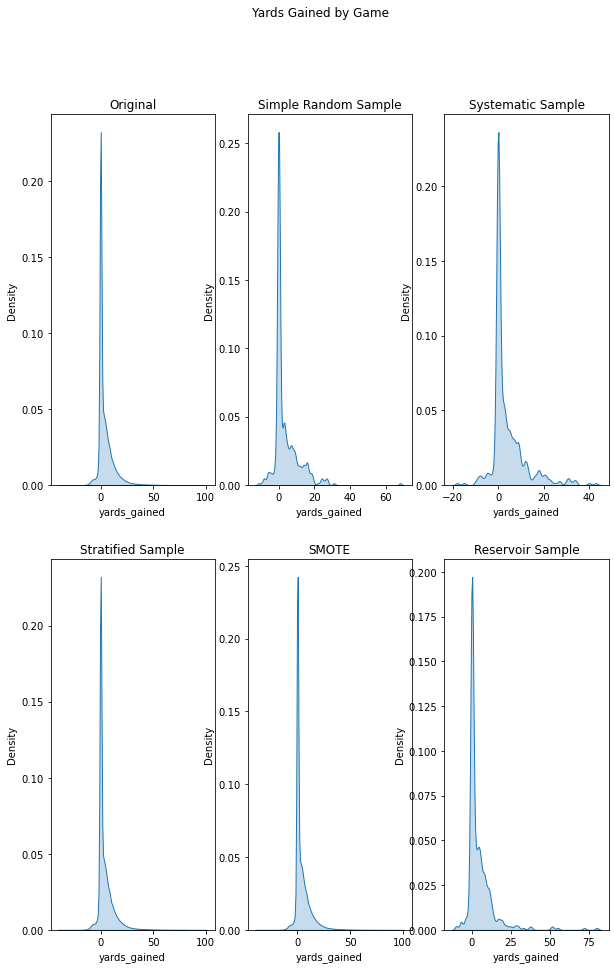

In [211]:
fig, axes = plt.subplots(2, 3, figsize=(10,15))
fig.suptitle('Yards Gained by Game')


axes[0,0].set_title('Original')
axes[0,1].set_title('Simple Random Sample')
axes[0,2].set_title('Systematic Sample')
axes[1,0].set_title('Stratified Sample')
axes[1,1].set_title('SMOTE')
axes[1,2].set_title('Reservoir Sample')

list_sample = [df_plays,simple_random_sample_set,systematic_sample_set,X_train,
               smote_X,reservoir_sample]

list_index_plot = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]

for i,j in zip(list_sample,list_index_plot):
    fig = sns.kdeplot(i['yards_gained'],bw_method=.10, shade=True,ax=axes[j])
    

Looking from the plots of the yards gained mean, show that the stratified sample and smote have a really fit from the original, the systematic sample can he tricky, the different between the smote and systematic sample is .01 but the density is spread, this 
is a important feature to consider.